# Accelerometer Data and Analysis
This notebook is for analyzing the data from my [DIY Accelerometer](https://gw.handysoftware.com/wiki/cpif/accelerometer-dev)

## Setup and Calculation Code

This is some initial setup code:

In [1]:
import io
import csv

from IPython.display import display
# This line configures matplotlib to show figures embedded in the notebook, 
# instead of opening a new window for each figure.
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

This ``calc_acceleration`` function does what it says.

In [2]:
def calc_acceleration(x, y):
    """
    Calculate the acceleration of a falling object.
    x: Sequence of time measurements of falling object
    y: Sequence of vertical position measurements
    Return (y0, v0, accel) where:
        y0 is the position at time zero
        v0 is the velocity at time zero
        accel is the acceleration
    Calculated using quadratic polynomial regression.
    """
    # https://en.wikipedia.org/wiki/Polynomial_regression
    if len(x) != len(y):
        raise ValueError("x and y must be arrays with the same length")
    if len(x) < 3:
        raise ValueError("x and y must have at least three items")
    A = np.vstack([np.ones(len(x)), x, x * x]).T
    y0, v0, a = np.linalg.lstsq(A, y, rcond=None)[0]
    return (y0, v0, a * 2)


## Real Data

### Vertical Position Data

These ``y`` values are the locations of the photosensors in my drop tube, in meters, measured from the top of the tube.

In [3]:
y = np.array([0.0914, 0.1602, 0.2321])

### Time Data

This is data from a series of experiments of dropping a small candy ball down the tube. 

The ``t0``, ``t1``, and ``t2`` times are the times that the object reached photosensor number 0, 1, and 2, respectively, in seconds. The clock starts when the accelerometer device is reset, and restarts again after every drop. I normalize the data as I read it in by subtracting the ``t0`` value from each time value in a row. This effectively defines time zero as the time the object hit photosensor zero.

The ``noise`` values were added manually, and are subjective. 0 means I didn't hear anything as the ball dropped down the tube. 1 means I heard maybe one small, quiet "tic". 2 and above means louder tics, multiple tics, rattling, etc. Basically anything above a 1 is not a good, clean drop. It was hard to get a good drop.

In [4]:
raw_data = '''
trial,t0,t1,t2,noise
1,22.548994,22.593104,22.630960,0
2,175.621487,175.663531,175.700481,0
3,21.878047,21.923396,21.961608,5
4,23.932810,23.982689,24.023914,3
5,15.754593,15.795143,15.831655,3
6,17.689981,17.735359,17.773624,9
7,16.827616,16.872719,16.911154,2
8,17.416975,17.458038,17.498268,9
9,37.333206,37.378647,37.416919,3
10,63.662218,63.720322,63.765880,7
'''
data = []
noise = []
with io.StringIO(raw_data.lstrip()) as f:
    r = csv.DictReader(f)
    for row in r:
        t = np.array([float(row['t0']), float(row['t1']), float(row['t2'])])
        t0 = t[0]
        t -= np.array([t0, t0, t0])
        data.append(t)
        noise.append(int(row['noise']))

## Graph of Position vs. Time

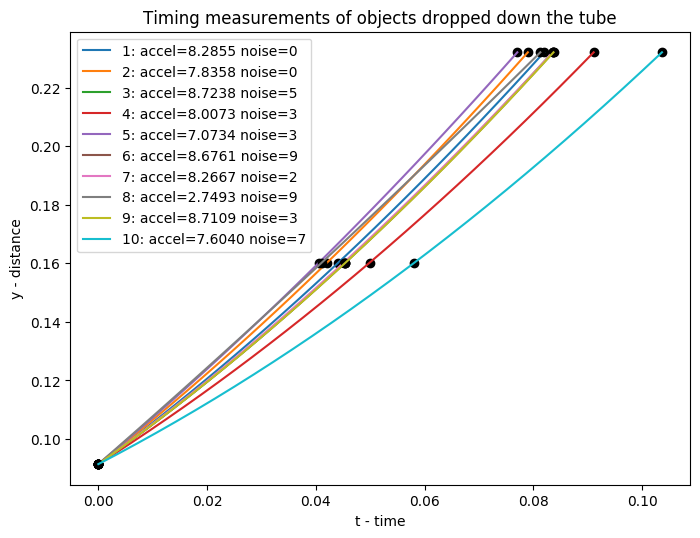

In [10]:
# Graph the samples
fig = plt.figure(num=None, figsize=(8, 6), dpi=100)
nrows, ncols = 1, 1

ax1 = fig.add_subplot(nrows, ncols, 1)
ax1.set_title("Timing measurements of objects dropped down the tube")
ax1.set_xlabel("t - time")
ax1.set_ylabel("y - distance")
for i, t in enumerate(data):
    # Plot the raw data points
    ax1.plot(t, y,  'o', color='black')
    # Calculate and plot the fitted curve
    y0, v0, accel = calc_acceleration(t, y)
    curve_t = np.linspace(t[0], t[-1], len(t) * 10)
    fitted_curve = y0 + (v0 * curve_t) + (0.5 * accel * curve_t * curve_t)
    ax1.plot(curve_t, fitted_curve, label=f"{i + 1}: accel={accel:.4f} noise={noise[i]}")

#fig.tight_layout()
ax1.legend()